<a href="https://colab.research.google.com/github/inefable12/QuimicaOrganica/blob/main/pubchempy_rdkit_py3dmol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://colapret.cm.utexas.edu/courses/Nomenclature_files/nonsuperimpose.gif" width="200" alt="molecula"  />




$$\Large \textit{Cuadernos de Código de Python para Ing. Biomédica}$$

---
$$\large\textbf{Química Orgánica: Repaso para la Práctica Nº1 | Parte I}$$

---
$$\textit{Uso de RDKit, PubChempy & Py3Dmol}$$

<br>
<br>

Autor: __Jesus Alvarado-Huayhuaz__

# 1. Diseño Molecular

- Dibujaremos moléculas orgánicas bidimensionales a partir de código SMILES empleando RDKit.
- Iniciaremos por instalar e importar algunas librerías.

## Instalación y librerías

In [1]:
%%capture
!pip install rdkit

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import MolFromSmiles
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw import IPythonConsole

## Ejemplo 1: Diseñar estructuras 2D

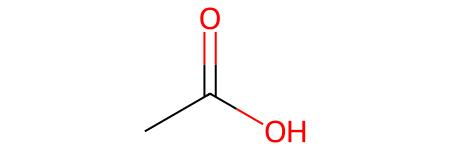

In [3]:
molecula = Chem.MolFromSmiles('CC(=O)O')
molecula

## Ejemplo 2: Quiralidad

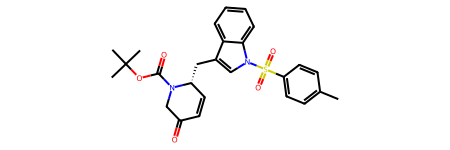

In [4]:
molecula = Chem.MolFromSmiles('O=C1CN(C(OC(C)(C)C)=O)[C@](C=C1)([H])CC2=CN(S(=O)(C3=CC=C(C)C=C3)=O)C4=CC=CC=C42')
molecula

## Ejemplo 3: Múltiples estructuras

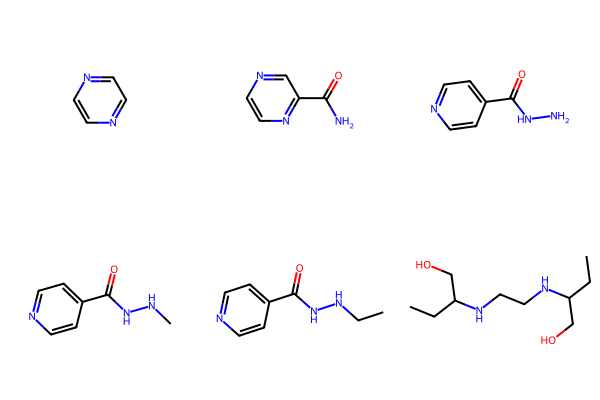

In [5]:
antiTBC = ['c1nccnc1','c1(C(=O)N)nccnc1','C1=CN=CC=C1C(=O)NN','C1=CN=CC=C1C(=O)NNC', 'C1=CN=CC=C1C(=O)NNCC','CCC(CO)NCCNC(CC)CO']
mol_lista = []

for i in antiTBC:
  mol = Chem.MolFromSmiles(i)
  mol_lista.append(mol)
Draw.MolsToGridImage(mol_lista)

# 2. Descriptores Moleculares

## Instalación

In [6]:
%%capture
!pip install pubchempy

## Ejemplo 4: Obtener SMILES

In [7]:
from pubchempy import get_compounds, Compound
comp = Compound.from_cid(1423)
print(comp.isomeric_smiles)

CCCCCCCNC1CCCC1CCCCCCC(=O)O


In [8]:
comp = Compound.from_cid(101971)
comp.isomeric_smiles

'COC1=CC2=C(C[C@H]3[C@H]4[C@@]2(CCCC4)CCN3CCC5=CC=CC=C5)C=C1.[C@@H]([C@H](C(=O)O)O)(C(=O)O)O'

## Ejemplo 5: Obtener propiedades

In [9]:
comps = get_compounds('Aspirin', 'name')
print(comps[0].xlogp)

1.2


In [10]:
comps = get_compounds('2,3-dihydroxybenzoylglycine', 'name')
print(comps[0].xlogp)

0.6


## Ejemplo 6: SMILES isomérico

In [11]:
comps_ds = get_compounds('glucose', 'name')
print(comps_ds[0].isomeric_smiles[3])

C


In [12]:
comps_ds = get_compounds('glucose', 'name')
print(comps_ds[0].isomeric_smiles)

C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O


## Ejemplo 7: Múltiples propiedades

In [13]:
from pubchempy import get_compounds

for compound in get_compounds('glucose', 'name'):
    print(compound.cid)
    print(compound.isomeric_smiles)

5793
C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O


## Ejemplo 8: Masa molecular

In [14]:
comps_ds = get_compounds('glucose', 'name')
print(comps_ds[0].exact_mass)

180.06338810


## Ejemplo 9: Átomos en la molécula

In [15]:
comps_ds = get_compounds('glucose', 'name')
print(comps_ds[0].atoms)

[Atom(1, O), Atom(2, O), Atom(3, O), Atom(4, O), Atom(5, O), Atom(6, O), Atom(7, C), Atom(8, C), Atom(9, C), Atom(10, C), Atom(11, C), Atom(12, C), Atom(13, H), Atom(14, H), Atom(15, H), Atom(16, H), Atom(17, H), Atom(18, H), Atom(19, H), Atom(20, H), Atom(21, H), Atom(22, H), Atom(23, H), Atom(24, H)]


## Ejemplo 10: Nombre IUPAC

In [16]:
import sys
import pubchempy as pcp

s= pcp.get_compounds('glucose','name')
print(s[0].iupac_name)

(3R,4S,5S,6R)-6-(hydroxymethyl)oxane-2,3,4,5-tetrol


En la documentación se encuentra disponible una serie de propiedades que pueden obtenerse con: from pubchempy import get_properties

# 3. Reacciones Químicas

In [ ]:
#Código necesario para generar la imagen, no editar
!pip install faerun-notebook==0.1.5b0
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

In [22]:
SmilesDrawer(value=[("Rxn", "CC=CC.O=O>>C(=O)=O.O")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CC=CC.O=O>>C(=O)=O.O…

## Ejemplo 11: Sn1

In [23]:
SmilesDrawer(value=[("Reacción SN1", "CC(C)(C)Br.O>>CC(C)(C)O.[Br-]")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Reacción SN1', 'CC(C)(C)Br.…

## Ejemplo 12: Sn2

In [36]:
SmilesDrawer(value=[("Rxn", "CCC(Br).[O-]>>CCC(O).[Br-]")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'CCC(Br).[O-]>>CCC(O)…

## Ejemplo 13: Otro

In [ ]:
SmilesDrawer(value=[("Rxn", "C=CCBr.[Na+].[I-]>CC(=O)C>C=CCI.[Na+].[Br-]")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Rxn', 'C=CCBr.[Na+].[I-]>CC…

# Visualización 3D

## Instalación y librerías

In [38]:
!pip install py3dmol

In [43]:
import py3Dmol

## Preámbulo

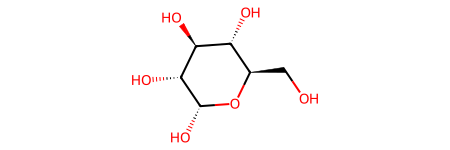

In [39]:
from rdkit.Chem import MolFromSmiles

alpha_d_glucose = 'O[C@@H]1[C@H](O)[C@@H](O)[C@H](O)[C@@H](CO)O1'
MolFromSmiles(alpha_d_glucose)

In [47]:
#@title Funcion para generar estereoisómeros

from itertools import product, zip_longest

def all_stereoisomers(smiles):
    '''Given an SMILES string, return list of SMILES string of all stereoisomers'''
    # convert smiles to a list of substrings separated by occurance of stereogenic centers
    split_smiles = [frag for frag in smiles.split('@') if frag != '']
    num_stereogenic_centers = len(split_smiles) - 1
    # obtain all combinations of configurations
    configurations = product(['@@', '@'], repeat = num_stereogenic_centers)
    # for each combinations of configurations, write the SMILES of the stereoisomer
    isomers = []
    for config in configurations:
        stereoisomer = ''
        for frag_config in zip_longest(split_smiles, config, fillvalue=''):
            stereoisomer += ''.join(frag_config)
        isomers.append(stereoisomer)
    return isomers

hexose_isomers = all_stereoisomers(alpha_d_glucose)
len(hexose_isomers)

32

## Estereoisómeros

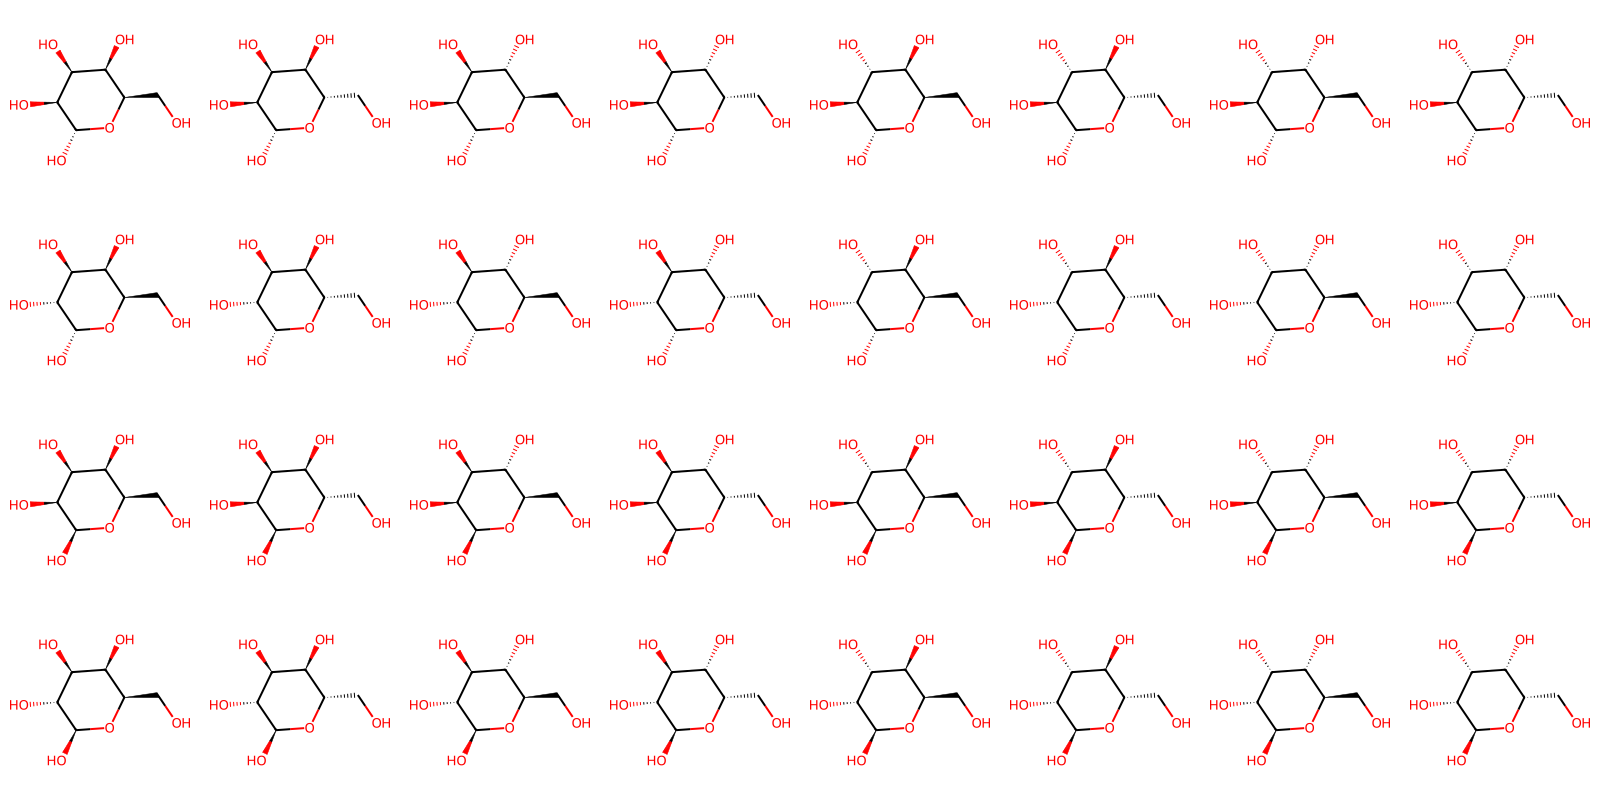

In [42]:
from rdkit.Chem.Draw import MolsToGridImage

mols = [MolFromSmiles(smiles) for smiles in hexose_isomers]
MolsToGridImage(mols, molsPerRow = 8)

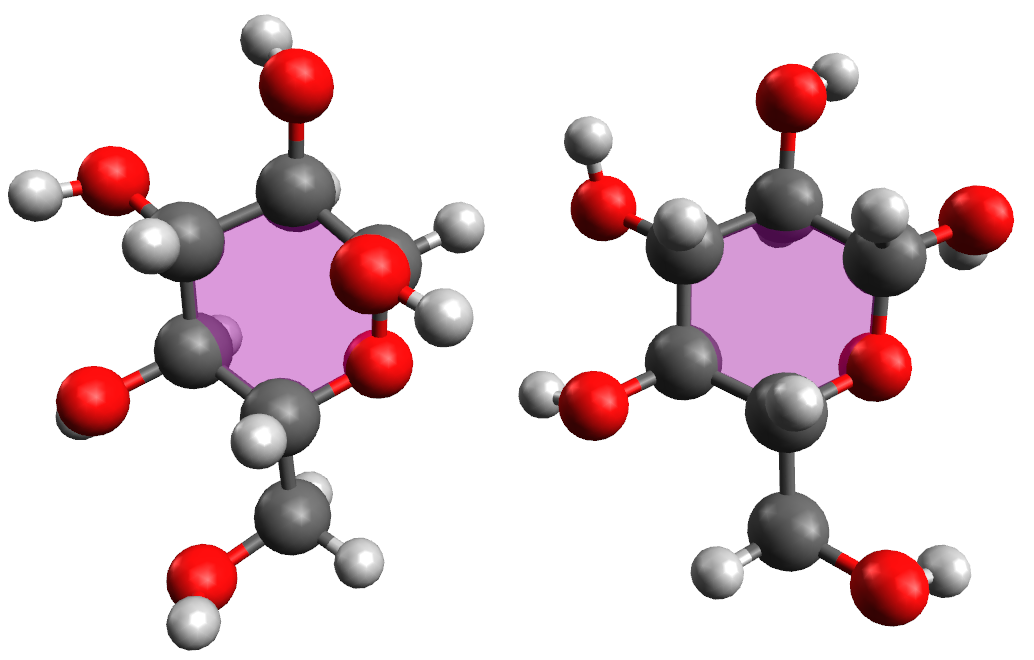

Cargando las coordenadas atómicas de alphaDglucopyranose y betaDglucopyranose

## Gráficas interactivas

In [62]:
%%capture
!wget https://raw.githubusercontent.com/inefable12/QuimicaOrganica/refs/heads/main/moleculas/A_gluc.pdb https://raw.githubusercontent.com/inefable12/QuimicaOrganica/refs/heads/main/moleculas/D_gluc.pdb https://raw.githubusercontent.com/inefable12/QuimicaOrganica/refs/heads/main/moleculas/A_D_glucop.pdb

In [130]:
view = py3Dmol.view(width=600, height=200, viewergrid=(1,3), linked=True)
view.addModel(open('A_gluc.pdb', 'r').read(),'pdb')
view.setStyle({'line':{'colorscheme':'spectrum','scale':2.0}}, viewer=(0,0))
view.setStyle({'stick':{'colorscheme':'cyanCarbon'}}, viewer=(0,1))
view.setStyle({'sphere':{'colorscheme':'silver','scale':0.7}}, viewer=(0,2))
view.setBackgroundColor('darkgreen',viewer=(0,0))
view.setBackgroundColor('purple',viewer=(0,1))
view.setBackgroundColor('black',viewer=(0,2))
view.zoomTo()
view.render()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [131]:
#@title betaDglucopyranose
view = py3Dmol.view(width=600, height=200, viewergrid=(1,3), linked=True)
view.addModel(open('D_gluc.pdb', 'r').read(),'pdb')
view.setStyle({'line':{'colorscheme':'spectrum','scale':2.0}}, viewer=(0,0))
view.setStyle({'stick':{'colorscheme':'cyanCarbon'}}, viewer=(0,1))
view.setStyle({'sphere':{'colorscheme':'silver','scale':0.7}}, viewer=(0,2))
view.setBackgroundColor('darkgreen',viewer=(0,0))
view.setBackgroundColor('purple',viewer=(0,1))
view.setBackgroundColor('black',viewer=(0,2))
view.zoomTo()
view.render()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.